In [1]:
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import numpy as np
import pandas as pd

In [2]:
PATH_TO_DATA = 'capstone_user_identification'

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

In [8]:
with open(os.path.join(PATH_TO_DATA, 
         'X_sparse_10users.pkl'), 'rb') as X_sparse_10users_pkl:
    X_sparse_10users = pickle.load(X_sparse_10users_pkl)
with open(os.path.join(PATH_TO_DATA, 
                       'y_10users.pkl'), 'rb') as y_10users_pkl:
    y_10users = pickle.load(y_10users_pkl)

In [9]:
X_sparse_10users.shape

(14061, 4735)

In [10]:
y_10users

array([['1'],
       ['1'],
       ['1'],
       ...,
       ['5'],
       ['5'],
       ['5']], dtype=object)

In [11]:
# stratify=y_10users - стратифицируем выборки

X_train, X_valid, y_train, y_valid = train_test_split(X_sparse_10users, y_10users, 
                                                      test_size=0.3, 
                                                     random_state=17, stratify=y_10users)

In [12]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)

In [ ]:
def plot_validation_curves(param_values, grid_cv_results_):
    train_mu, train_std = grid_cv_results_['mean_train_score'], grid_cv_results_['std_train_score']
    valid_mu, valid_std = grid_cv_results_['mean_test_score'], grid_cv_results_['std_test_score']
    train_line = plt.plot(param_values, train_mu, '-', label='train', color='green')
    valid_line = plt.plot(param_values, valid_mu, '-', label='test', color='red')
    plt.fill_between(param_values, train_mu - train_std, train_mu + train_std, edgecolor='none',
                     facecolor=train_line[0].get_color(), alpha=0.2)
    plt.fill_between(param_values, valid_mu - valid_std, valid_mu + valid_std, edgecolor='none',
                     facecolor=valid_line[0].get_color(), alpha=0.2)
    plt.legend()

In [13]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100, n_jobs=-1)
scores = cross_val_score(knn, X_train, y_train, cv=skf, scoring='accuracy')

print(scores)
print(np.mean(scores))

[0.56164384 0.56267155 0.57260525]
0.5656402096404801
CPU times: user 20min 20s, sys: 15.7 s, total: 20min 36s
Wall time: 35.9 s


In [14]:
%%time

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=17, n_estimators=100, oob_score=True, n_jobs=-1)
forest.fit(X_train, y_train)
print(forest.oob_score_)

0.7242430400325137
CPU times: user 1min 1s, sys: 5.29 s, total: 1min 6s
Wall time: 8.47 s


In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logit = LogisticRegression(random_state=17)
scores = cross_val_score(logit, X_train, y_train, cv=skf, scoring='accuracy')

print(scores)
print(np.mean(scores))

[0.76407915 0.7642574  0.75655888]
0.7616318068508203


In [19]:
%%time

logit_c_values1 = np.logspace(-4, 2, 10)

logit_grid_searcher1 = LogisticRegressionCV(Cs=logit_c_values1,
                                            cv=skf,
                                            multi_class='multinomial',
                                            n_jobs=-1)
logit_grid_searcher1.fit(X_train, y_train)

print(logit_grid_searcher1.scores_)


{'39': array([[0.42891933, 0.50898021, 0.59878234, 0.68280061, 0.73637747,
        0.75190259, 0.75525114, 0.75829528, 0.743379  , 0.74794521],
       [0.42939921, 0.50564196, 0.60414761, 0.67063129, 0.72339128,
        0.74992376, 0.75754803, 0.75449832, 0.74443428, 0.74443428],
       [0.42892007, 0.50732154, 0.59792556, 0.67419158, 0.72788286,
        0.75137279, 0.75228798, 0.75289811, 0.75167785, 0.74923734]]), '27': array([[0.42891933, 0.50898021, 0.59878234, 0.68280061, 0.73637747,
        0.75190259, 0.75525114, 0.75829528, 0.743379  , 0.74794521],
       [0.42939921, 0.50564196, 0.60414761, 0.67063129, 0.72339128,
        0.74992376, 0.75754803, 0.75449832, 0.74443428, 0.74443428],
       [0.42892007, 0.50732154, 0.59792556, 0.67419158, 0.72788286,
        0.75137279, 0.75228798, 0.75289811, 0.75167785, 0.74923734]]), '33': array([[0.42891933, 0.50898021, 0.59878234, 0.68280061, 0.73637747,
        0.75190259, 0.75525114, 0.75829528, 0.743379  , 0.74794521],
       [0.42939921

In [33]:
print(logit_grid_searcher1.Cs_)
print(len(logit_grid_searcher1.Cs_))

logit_c_values1 = logit_grid_searcher1.Cs_

[1.00000000e-04 4.64158883e-04 2.15443469e-03 1.00000000e-02
 4.64158883e-02 2.15443469e-01 1.00000000e+00 4.64158883e+00
 2.15443469e+01 1.00000000e+02]
10


In [32]:
for res in logit_grid_searcher1.scores_.items():
    logit_mean_cv_scores1 = res[1][0]

logit_mean_cv_scores1

array([0.42891933, 0.50898021, 0.59878234, 0.68280061, 0.73637747,
       0.75190259, 0.75525114, 0.75829528, 0.743379  , 0.74794521])

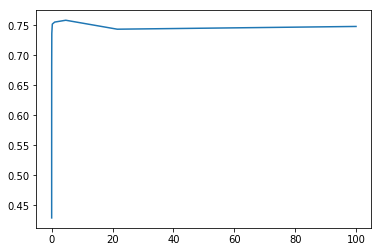

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(logit_c_values1, logit_mean_cv_scores1)